# Data Analysis Assignment-Haotian Mai

In [335]:
import pandas as pd
import matplotlib as mplstyle
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [336]:
mplstyle.rcParams['pdf.fonttype'] = 42

schools_palette = ["#3498db", "#e74c3c"]


In [337]:
df = pd.read_csv('campuscrime.csv')

Basic Calculation

In [338]:
df.describe()

,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson
count,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,1.082848e+05,0.021930,0.004386,3.995614,0.048246,1.728070,2.583333,23.793860,6.052632,0.820175
std,1.537517e+05,0.174224,0.066227,5.210543,0.234373,2.383072,3.545436,25.235744,8.105409,1.686468
min,2.016000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.949325e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000
50%,5.477800e+04,0.000000,0.000000,2.000000,0.000000,1.000000,1.500000,15.500000,3.000000,0.000000
75%,1.227450e+05,0.000000,0.000000,5.250000,0.000000,3.000000,4.000000,36.000000,8.000000,1.000000
max,1.323315e+06,2.000000,1.000000,30.000000,2.000000,19.000000,27.000000,118.000000,57.000000,11.000000


# Finding

I found some of the max values, matching with the relating schools, could yield some interesting small quick facts. Like the UCLA has the highest count of burglary, San Jose State has two murders in campus, University of New Mexico has the highest amount of vehicle (stolen?) and so forth.

----------------------------------------------------------------------------------------------------------------------

Panda SUM & sort by ascending order of the total crime incidents

Added a column "total_crime" to add up all the crime incidents each school has, then sort them from the highest to the lowest.

In [339]:
df["total_crime"] = df["murder"] + df["manslaughter"] + df["forcible"] + df["nonforce"] + df["robbery"] + df["agg_aslt"] + df["burglary"] + df["vehicle"] + df["arson"]
df = df.sort_values(by="total_crime", ascending=0)
df

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_crime
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11,174
116,Pennsylvania State University-Main Campus,45628,0,0,24,0,2,6,112,1,11,156
206,University of South Carolina-Columbia,30721,0,0,1,0,2,8,113,22,0,146
169,University of California-Los Angeles,39271,0,0,8,0,2,4,118,7,0,139
69,Indiana University-Bloomington,42731,0,0,11,0,3,12,89,18,3,136
167,University of California-Davis,63464,0,0,24,0,5,4,86,13,1,133
209,University of Toledo,67830,0,0,2,0,1,4,118,0,4,129
142,Stony Brook University,23920,0,0,13,0,2,2,96,7,2,122
189,University of Maryland-College Park,75262,0,0,4,0,4,4,64,37,1,114
91,Michigan State University,191300,0,0,15,0,1,10,77,9,0,112


Create a bar chart (show total crime incidents in each school)

/Users/haotian/.virtualenvs/dataj/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead


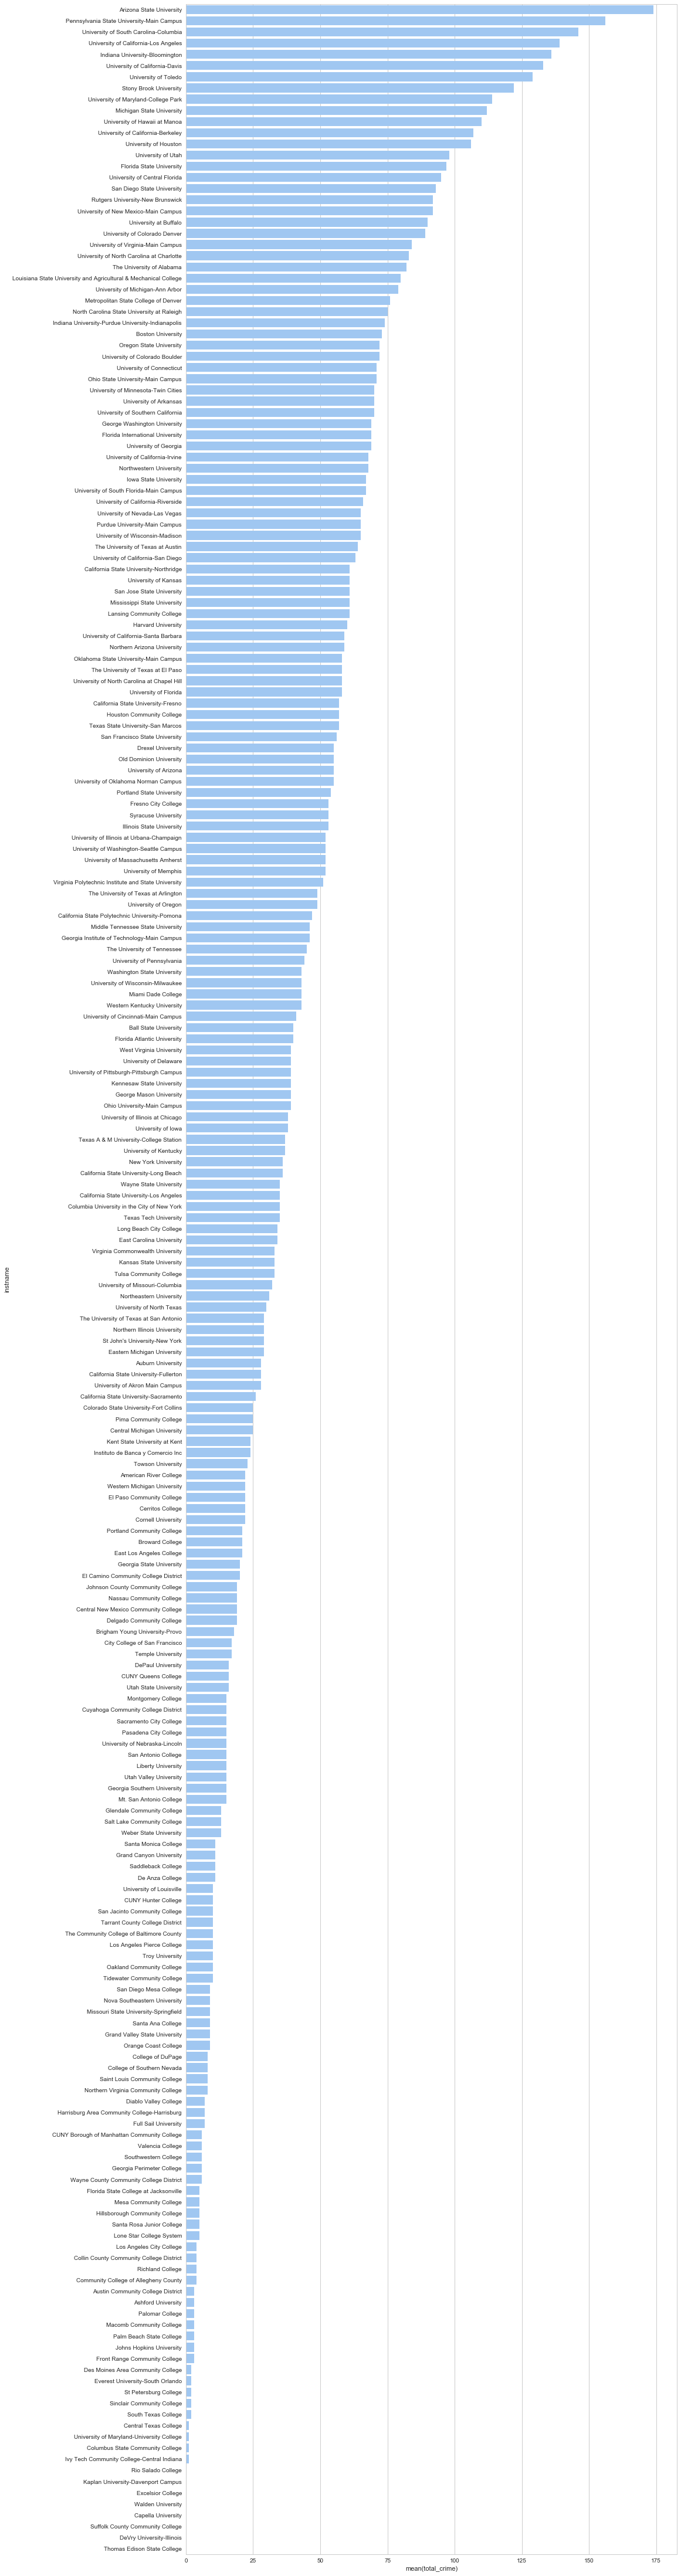

In [340]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 80))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=df["total_crime"], y="instname", data=df,
            label="Total", color="b")


# Finding

I was expecting to see the more students are enrolled in a school, the higher the chance for criminal activities may happen. But simply by looking at the top schools with the highest count of total criminal incidents, it might not be the case. Arizona State has an absurdly high amount of enrolled students, its criminal cases' total, althought still the highest, was not that much more than the follow-ups. Penn State, as the runner-up, has 240,000 fewer students, but its cases number is only a dozen short. Either Arizona State is somehow extremely safe because of some reasons, or there are other factors that made the runner-ups schools much more unsafe.

----------------------------------------------------------------------------------------------------------------------

Facetgrid

Try to find out whether enrolled student numbers and criminal activities are realted or not. Try to clear out the doubts from previous analysis.

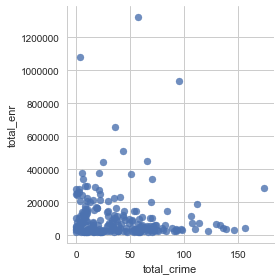

In [366]:
g = sns.FacetGrid(df,
                  palette=schools_palette,
                  size=4)

g.map(plt.scatter, "total_crime", "total_enr", 
      alpha=.8)

# Finding

WOW they are really not related to each other. But it would still be interesting to look at those outliners, I guess.

----------------------------------------------------------------------------------------------------------------------

Pairgrid

Take every variable in the dataset and plot it against every other variable

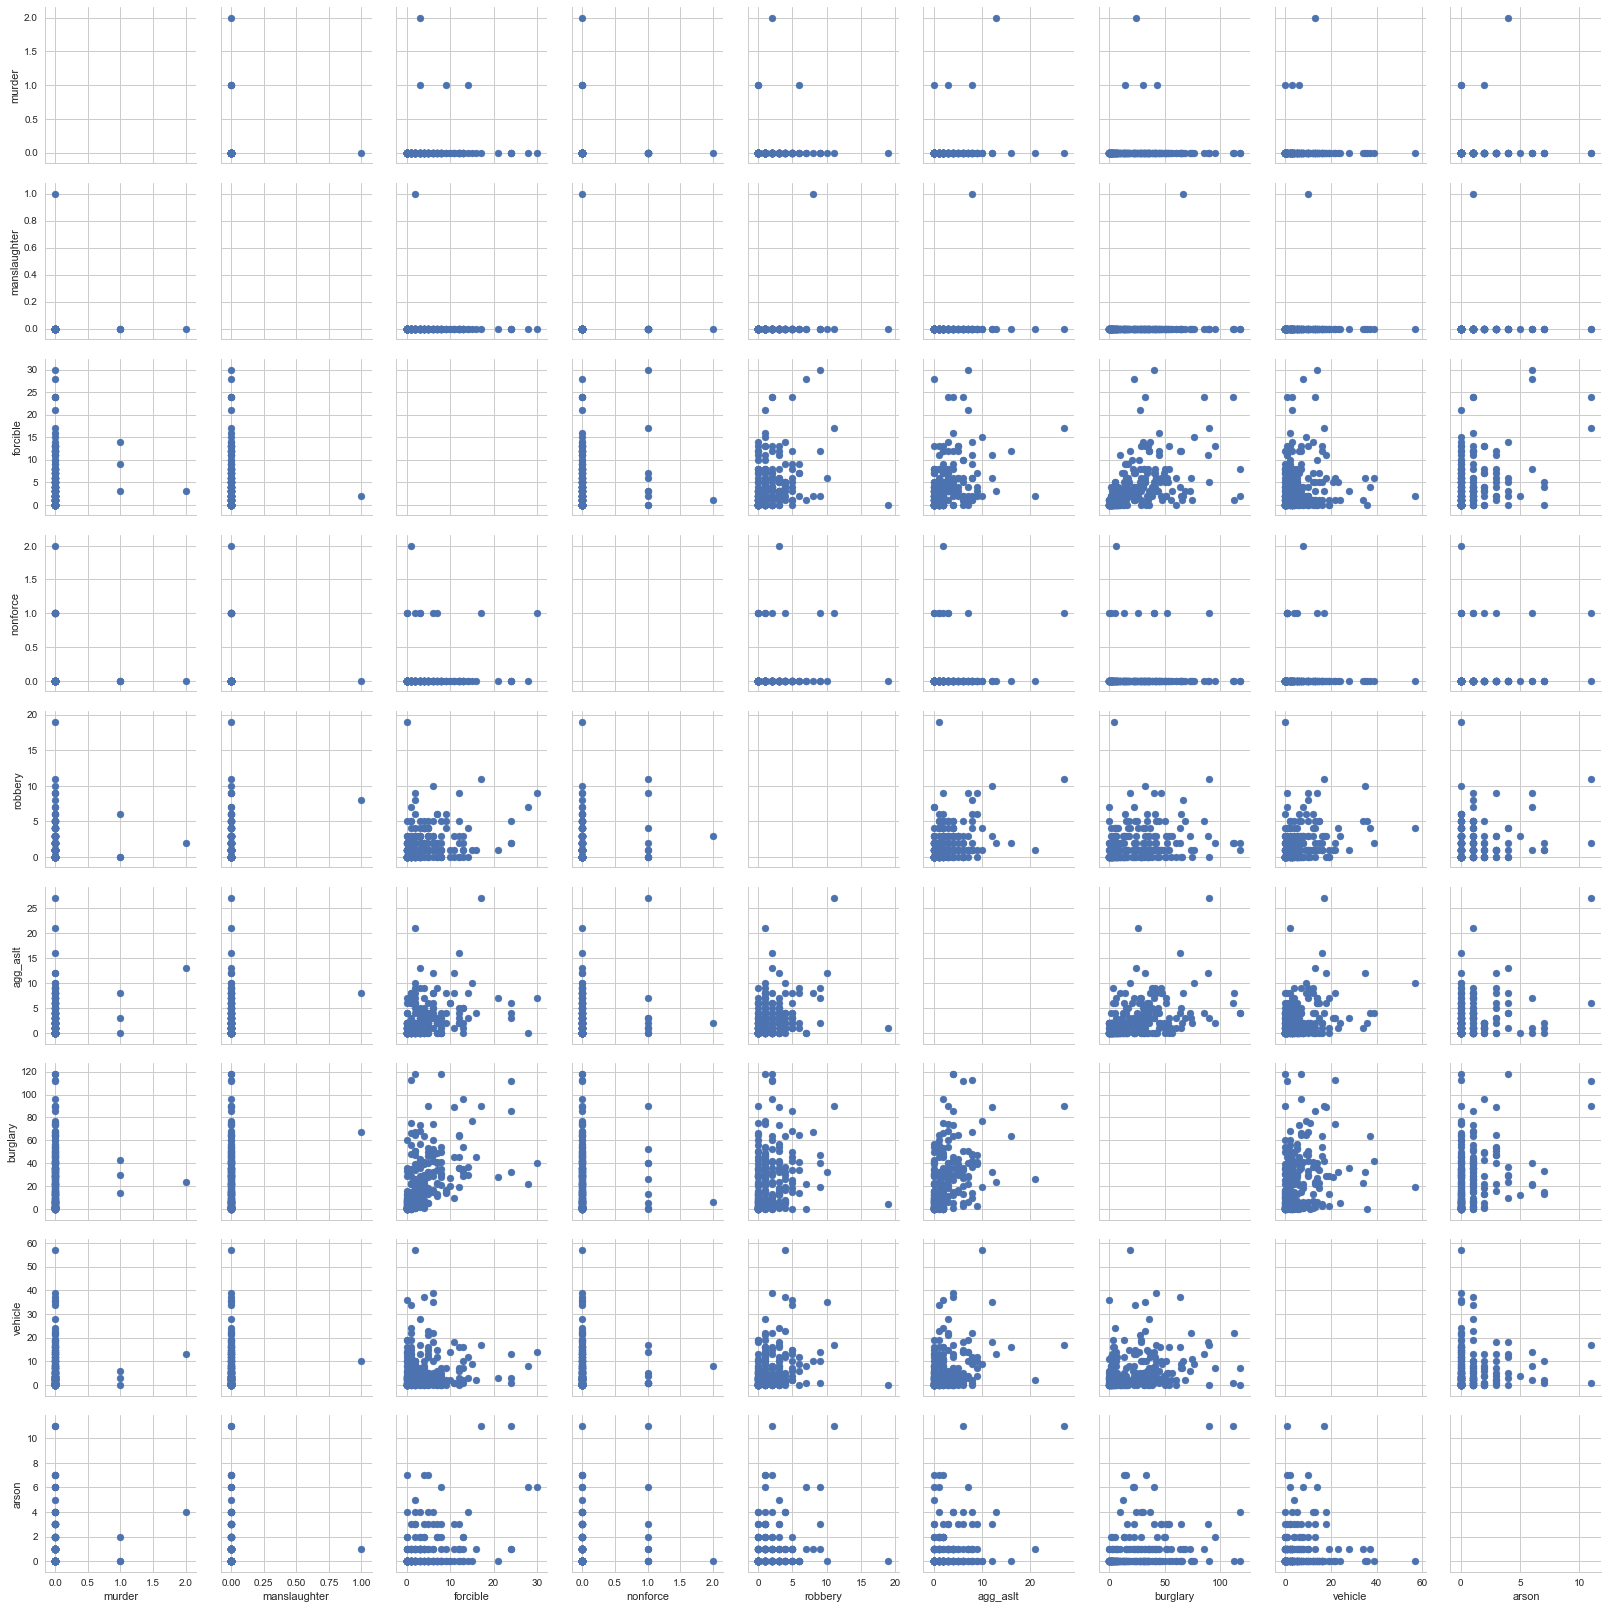

In [342]:
grid_columns = ["murder", "manslaughter", "forcible", "nonforce", "robbery", "agg_aslt", "burglary", "vehicle", "arson"]
g = sns.PairGrid(df[grid_columns],
                palette=crime_palette)
#g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

# Finding

WOW, they are not helpful at all.

----------------------------------------------------------------------------------------------------------------------

Violent vs. Non-violent crime

Referencing the definition on some law websites:

What Are Some Examples of Non-Violent and Violent Crimes?
Non-violent crimes can cover a broad spectrum of offenses. They usually involve some sort of “property crime” resulting in damage to another person’s property.

Some of the more common non-violent offenses may include:

Most property crimes, such as theft, embezzlement, receipt of stolen goods, and arson of personal property
Fraud, tax crimes, other forms of white collar crime
Drug and alcohol-related crimes
Prostitution
Racketeering and gambling
Bribery
Violent crimes are also called “offenses against the person”, meaning that the physical body of another person was harmed. Common violent offenses include:

Assault and battery
Homicides
Domestic violence
Robbery
Sexual assault and abuse
False imprisonment
- See more at: http://www.legalmatch.com/law-library/article/non-violent-vs-violent-crimes.html#sthash.VO5MipXw.dpuf

I created two buckets — "violent_crime" and "non_violent_crime"
"violent_crime" includes murder, manslaughter, forcible, robbery and aggressive assult
"non_violent crime" includes nonforce, burglary, vehicle and arson

By separating the violent and non-violent crime, I was hoping to find potantial reason or connection between them and between the total crime activities.

In [353]:
df_1["total_crime"] = df["murder"] + df["manslaughter"] + df["forcible"] + df["nonforce"] + df["robbery"] + df["agg_aslt"] + df["burglary"] + df["vehicle"] + df["arson"]
df_1["violent_crime"] = df["murder"] + df["manslaughter"] + df["forcible"] + df["robbery"] + df["agg_aslt"] 
df_1["non_violent_crime"] = df["nonforce"] + df["burglary"] + df["vehicle"] + df["arson"]
df_1= df_1.sort_values(by=["violent_crime", "total_crime"])
df_1

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_crime,violent_crime,non_violent_crime
122,Rio Salado College,251090,0,0,0,0,0,0,0,0,0,0,0,0
77,Kaplan University-Davenport Campus,56606,0,0,0,0,0,0,0,0,0,0,0,0
47,Excelsior College,35608,0,0,0,0,0,0,0,0,0,0,0,0
220,Walden University,48982,0,0,0,0,0,0,0,0,0,0,0,0
16,Capella University,36375,0,0,0,0,0,0,0,0,0,0,0,0
143,Suffolk County Community College,107148,0,0,0,0,0,0,0,0,0,0,0,0
38,DeVry University-Illinois,279210,0,0,0,0,0,0,0,0,0,0,0,0
157,Thomas Edison State College,20251,0,0,0,0,0,0,0,0,0,0,0,0
73,Ivy Tech Community College-Central Indiana,42092,0,0,0,0,0,0,1,0,0,1,0,1
27,Columbus State Community College,247368,0,0,0,0,0,0,1,0,0,1,0,1


/Users/haotian/.virtualenvs/dataj/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
/Users/haotian/.virtualenvs/dataj/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead


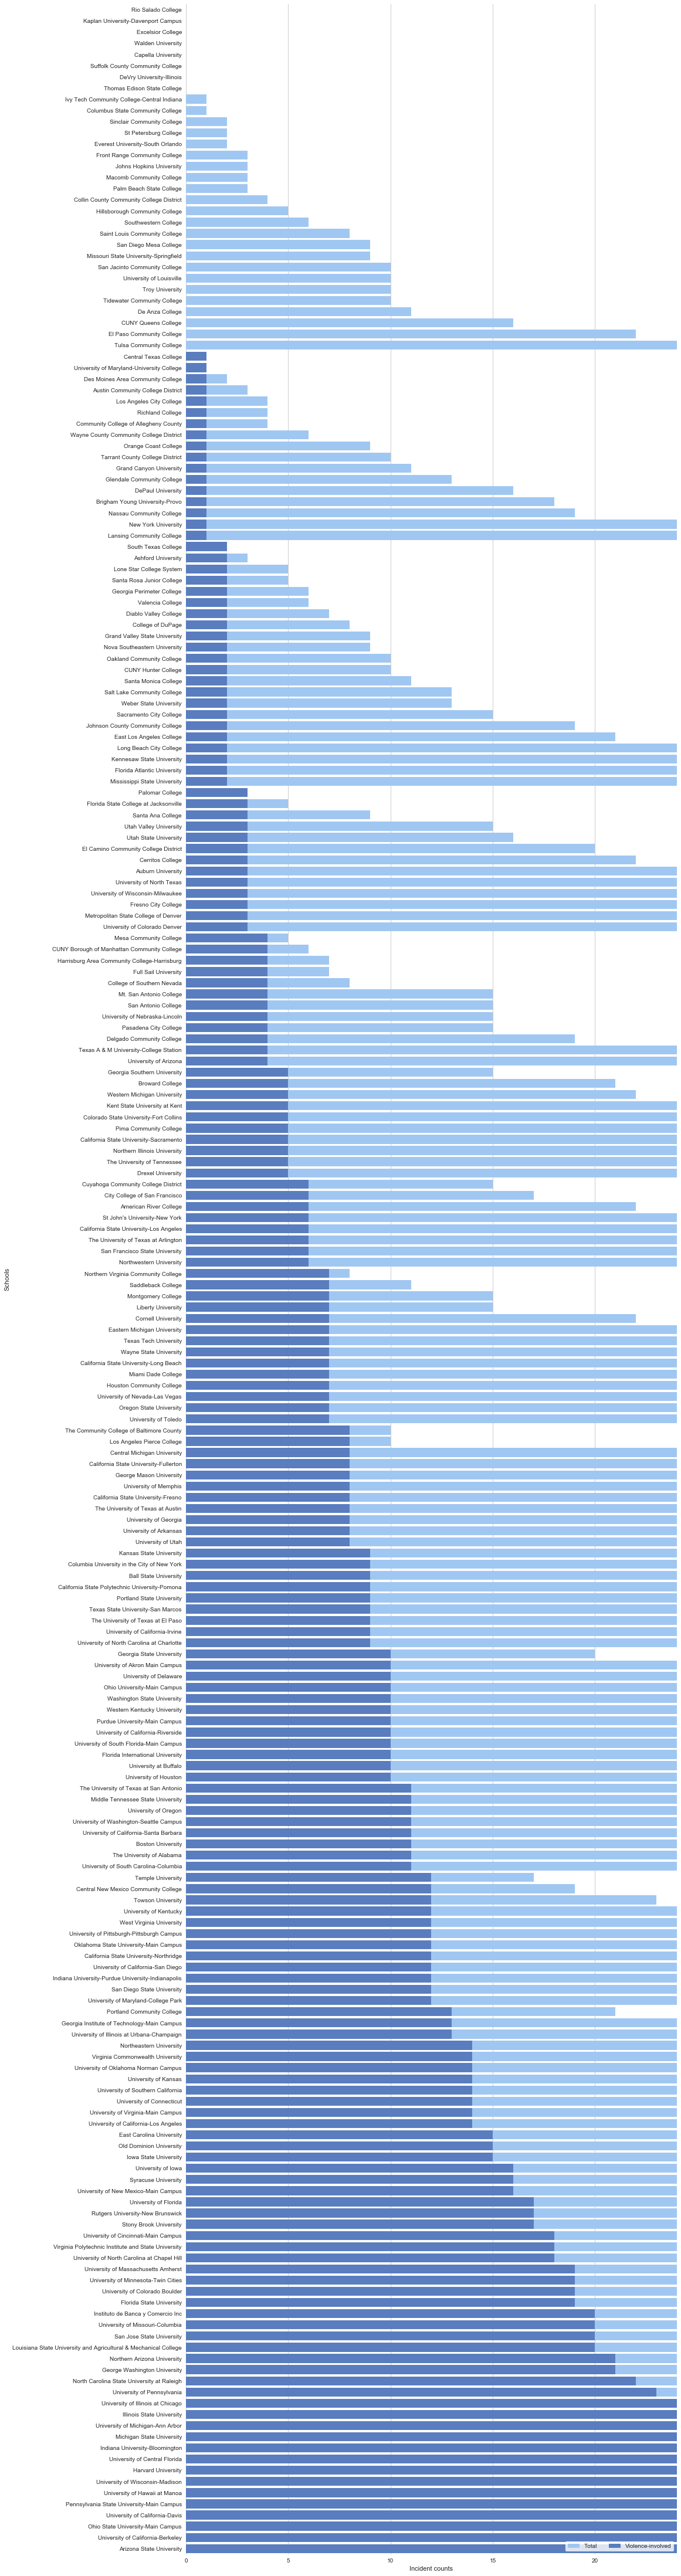

In [352]:
f, ax = plt.subplots(figsize=(15, 80))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total_crime", y="instname", data=df_1,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="violent_crime", y="instname", data=df_1,
            label="Violence-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="Schools",
       xlabel="Incident counts")
sns.despine(left=True, bottom=True)

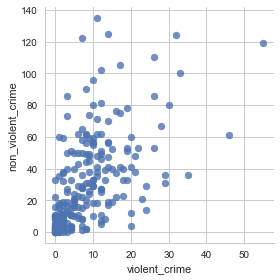

In [363]:
g = sns.FacetGrid(df_1,
                  palette=schools_palette,
                  size=4)

g.map(plt.scatter, "violent_crime", "non_violent_crime", 
      alpha=.8)

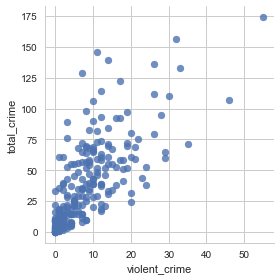

In [364]:
g = sns.FacetGrid(df_1,
                  palette=schools_palette,
                  size=4)

g.map(plt.scatter, "violent_crime", "total_crime", 
      alpha=.8)

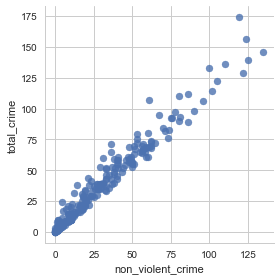

In [365]:
g = sns.FacetGrid(df_1,
                  palette=schools_palette,
                  size=4)

g.map(plt.scatter, "non_violent_crime", "total_crime", 
      alpha=.8)

# Finding

At first just looking at the portion of violent crimes among all the crime activities in the bar chart, I thought "of course the more violent crime a school has, the more likely that the school would have a higher rate of crime overall.
However, after puting the three indicators into scatter plots, I found the non-violent crime actually have a more direct connection to the overall crime activities in campuses. It was nearly one straight line.

I then did a quick math...

In [361]:
df_1.sum(axis=0)

instname             Rio Salado CollegeKaplan University-Davenport ...
total_enr                                                     24688928
murder                                                               5
manslaughter                                                         1
forcible                                                           911
nonforce                                                            11
robbery                                                            394
agg_aslt                                                           589
burglary                                                          5425
vehicle                                                           1380
arson                                                              187
total_crime                                                       8903
violent_crime                                                     1900
non_violent_crime                                                 7003
dtype:

Turns out, it was because the majority of the crime activities are comprised of non-violent crime, which makes sense, because the more severe the crime is, normally would not tend to happens more often. We couldn't afford to handle murderer on a daily basis!
But it's was still interesting to see how different results and connections can be so quickly revealed with the help of these simple visualization tool!